# Predictive Thyroid Disease Project - EDA

To make a predictive model if the thyroid cancer patient is likely to respond to the treatment or not.

# Initial Set Up

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder



# Import my custom library 
import MyCustDataSciLib as MyCustDataSciLib

In [2]:
# load the cleaned data
df = pd.read_csv("Thyroid_Disease_DataWrangled.csv")

In [3]:
# Display number of rows, column names, and column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     383 non-null    int64 
 1   gender                  383 non-null    object
 2   smoking                 383 non-null    object
 3   hx_smoking              383 non-null    object
 4   hx_radiotherapy         383 non-null    object
 5   thyroid_function        383 non-null    object
 6   physical_examination    383 non-null    object
 7   adenopathy              383 non-null    object
 8   pathology               383 non-null    object
 9   focality                383 non-null    object
 10  risk                    383 non-null    object
 11  t                       383 non-null    object
 12  n                       383 non-null    object
 13  m                       383 non-null    object
 14  stage                   383 non-null    object
 15  respon

In [4]:
# again check for missing data 
df.isnull().sum()

age                       0
gender                    0
smoking                   0
hx_smoking                0
hx_radiotherapy           0
thyroid_function          0
physical_examination      0
adenopathy                0
pathology                 0
focality                  0
risk                      0
t                         0
n                         0
m                         0
stage                     0
response                  0
recurrence                0
thyroid_function_merge    0
dtype: int64

In [5]:
# Display the first few rows
df.head()

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence,thyroid_function_merge
0,27,f,no,no,no,euthyroid,single_nodular_goiter-left,no,micropapillary,uni-focal,low,t1a,n0,m0,i,indeterminate,no,thyroid_normal
1,34,f,no,yes,no,euthyroid,multinodular_goiter,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal
2,30,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal
3,62,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal
4,62,f,no,no,no,euthyroid,multinodular_goiter,no,micropapillary,multi-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal


# Checking Column Type (Categorical or Numeric)

In [6]:
# checking data types
df.info()

# numeric columns
    # 'age'

# categorical columns
    # everything except for 'age'
    # alot of these can definitely be converted to numeric columns in feature engineering step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     383 non-null    int64 
 1   gender                  383 non-null    object
 2   smoking                 383 non-null    object
 3   hx_smoking              383 non-null    object
 4   hx_radiotherapy         383 non-null    object
 5   thyroid_function        383 non-null    object
 6   physical_examination    383 non-null    object
 7   adenopathy              383 non-null    object
 8   pathology               383 non-null    object
 9   focality                383 non-null    object
 10  risk                    383 non-null    object
 11  t                       383 non-null    object
 12  n                       383 non-null    object
 13  m                       383 non-null    object
 14  stage                   383 non-null    object
 15  respon

# Numeric Columns

## Outliers

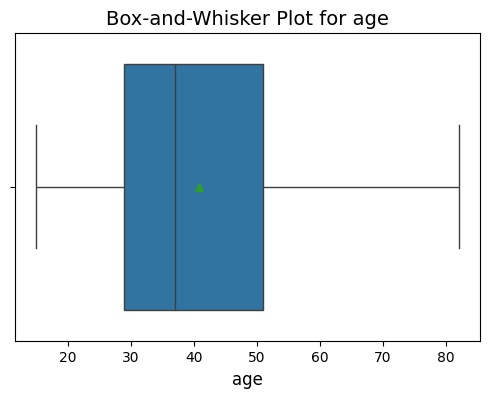

In [7]:
# Doing the age column as the only continous value column
MyCustDataSciLib.visualize_outliers(df, 'age')
# reminder for me,
    # the line in the box is the median
    # the green triangle is the mean

# there are no outliers in the age column 

## Descriptive Stat

In [8]:
# Descriptive statistics for numerical columns in entire df
# Age is the only column with continuous value so descriptive analysis will work better on it

df.describe()

# the youngest age is 15
# the oldest age is 82
# Median age is 37 with avg 40 which is higher than the median thus slightly skew to older, thus implying few very old individuals moving moving the avg older
# std of 15 means 68% of the data falls within 1 std between 40+-15 so between 25 and 56

,age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [9]:
# find the mode 
df['age'].mode()

# mode is 31

0    31
Name: age, dtype: int64

## Histogram

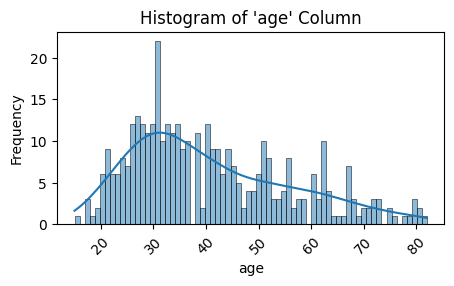

In [10]:
# since youngest is 15 and oldest is 82 the difference is 67 so will make 70 bins
MyCustDataSciLib.quick_histogram(df, 'age', histo_bins=70)
# we can see most of the age groups are around the 30 years mark with 31 years old making up the most people 

# Categorical Columns

## Gender Counts

In [11]:
df['gender'].value_counts()
# seems to be a gender imbalance in the data as more females than males are in here

gender
f    312
m     71
Name: count, dtype: int64

## Exploring Distribution within Each Column

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     383 non-null    int64 
 1   gender                  383 non-null    object
 2   smoking                 383 non-null    object
 3   hx_smoking              383 non-null    object
 4   hx_radiotherapy         383 non-null    object
 5   thyroid_function        383 non-null    object
 6   physical_examination    383 non-null    object
 7   adenopathy              383 non-null    object
 8   pathology               383 non-null    object
 9   focality                383 non-null    object
 10  risk                    383 non-null    object
 11  t                       383 non-null    object
 12  n                       383 non-null    object
 13  m                       383 non-null    object
 14  stage                   383 non-null    object
 15  respon

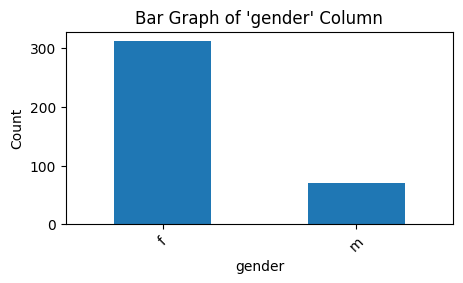

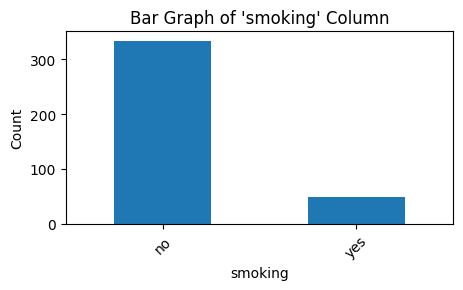

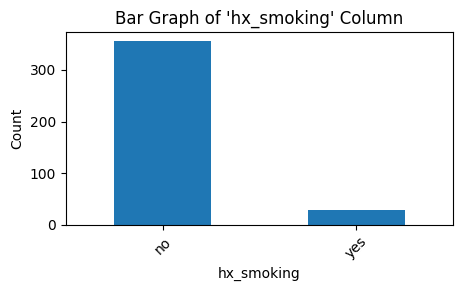

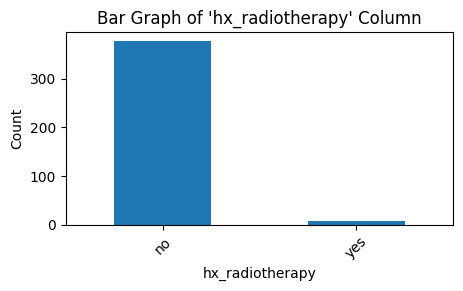

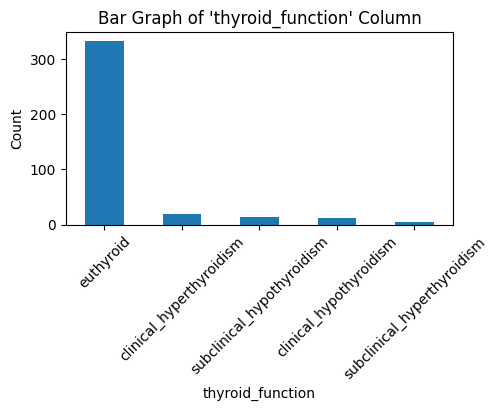

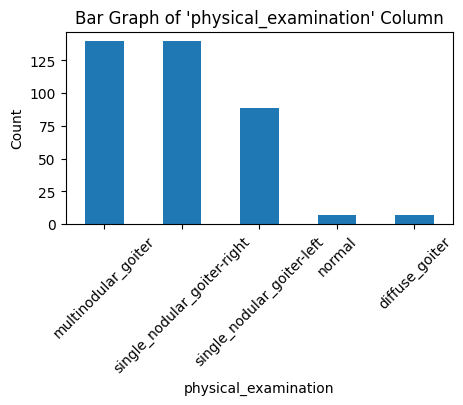

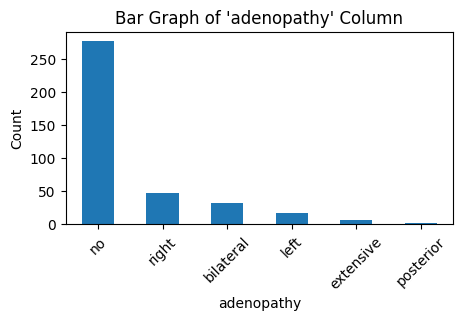

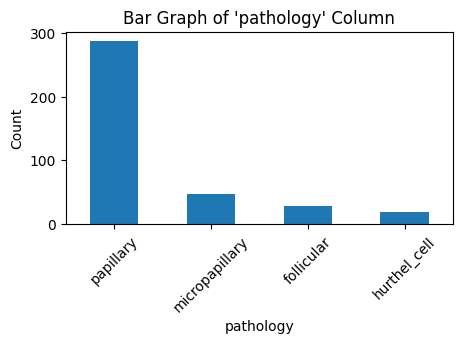

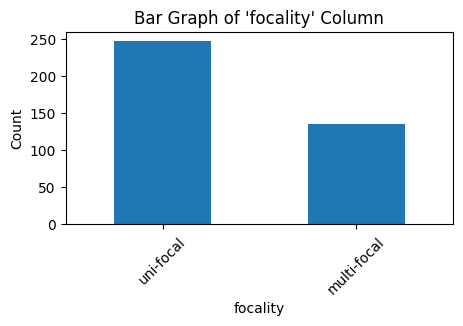

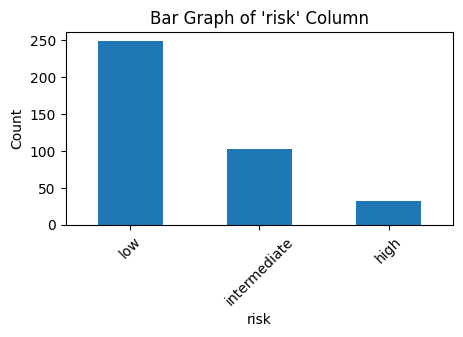

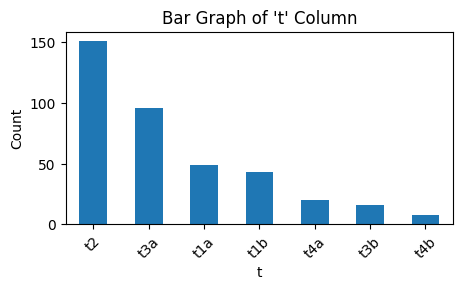

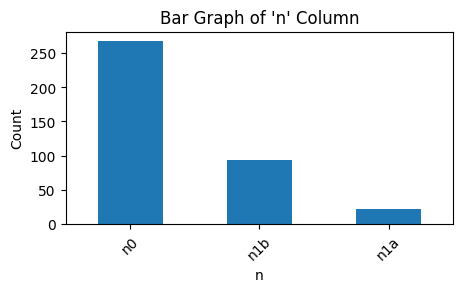

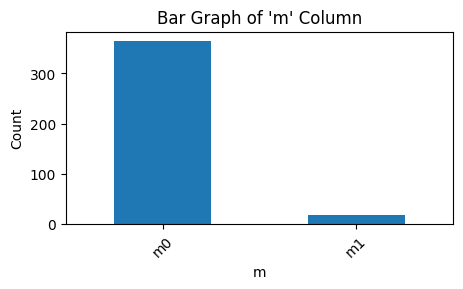

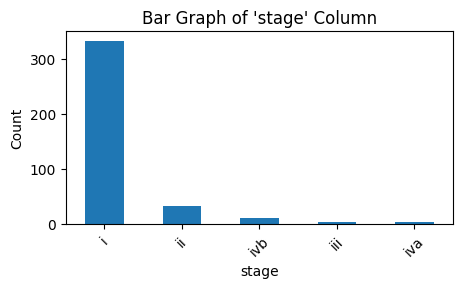

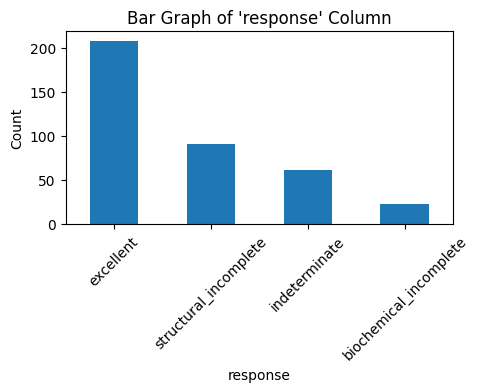

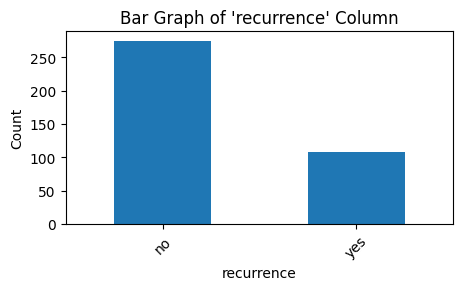

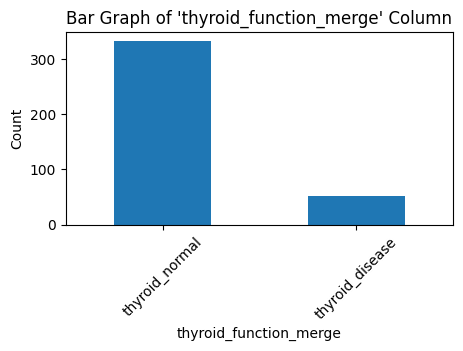

In [13]:
# I want to see the count / distribution and roughly the proportion of values within each column as a way to explore the data
# Bar graph for each categorical column
# Histogram for each numerical column

# the main wrapper function will quickly run them all but if any column seems to be interesting (like maybe need to modify the bin number on a particular histogram) then I can use the inidividal function as well 

MyCustDataSciLib.quick_plot_all_categorical_col(df)

# it appears alot of the categorical columns are imbalance

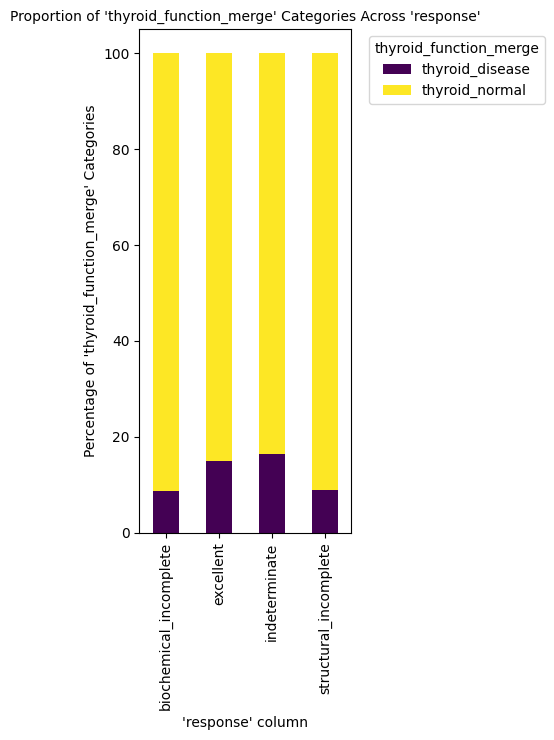

In [28]:
# stacked bar graph
    # Reminder - Stacked bar charts are used to show the proportion of categories in one column relative to the categories in another column.

col_each_stack = 'thyroid_function_merge'
each_col = 'response' 


# Create a contingency table
contingency_table = pd.crosstab(df[col_each_stack], df[each_col], normalize='columns') * 100

# Plot the stacked bar chart
contingency_table.T.plot(kind='bar', stacked=True, figsize=(5, 7.5), colormap='viridis')

# Add titles and labels
plt.title(f"Proportion of '{col_each_stack}' Categories Across '{each_col}'", fontsize=10)
plt.xlabel(f"'{each_col}' column", fontsize=10)
plt.ylabel(f"Percentage of '{col_each_stack}' Categories", fontsize=10)
plt.legend(title=col_each_stack, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

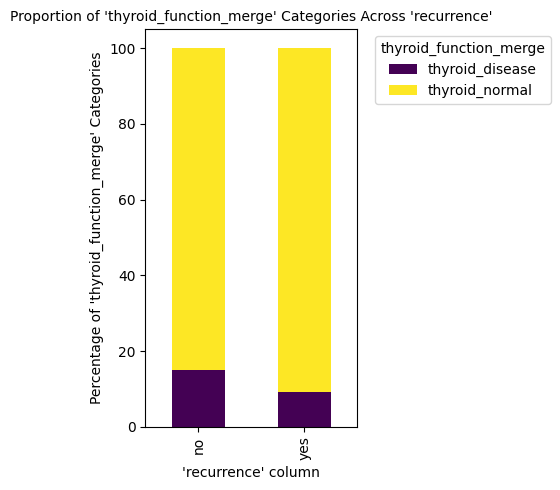

In [15]:
MyCustDataSciLib.quick_stacked_bar_graph (df,'thyroid_function_merge', 'recurrence')

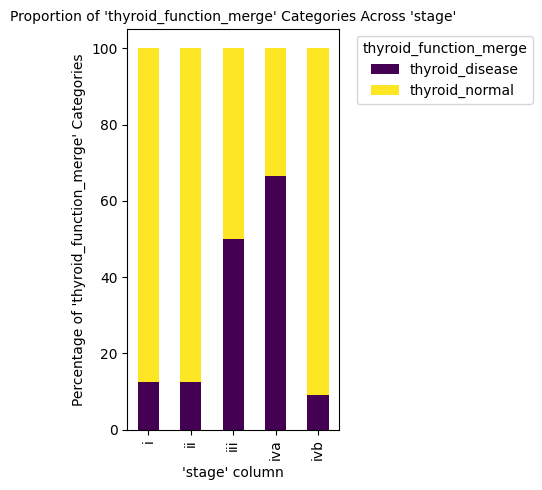

In [16]:
MyCustDataSciLib.quick_stacked_bar_graph (df,'thyroid_function_merge', 'stage')

# in feature engineering can fuse these data together

# Relationships between 2 columns

## Relationships between 2 categorical columns

In [17]:
list_of_signifigant_col_relationship = MyCustDataSciLib.chi_square_test_all_col(df, 'thyroid_function_merge', columns='all')

chi_square_testing between 'thyroid_function_merge' and 'gender'
Chi-square Statistic: 0.6268383705994295
p-value: 0.42851739743856343 , which is FALSE
Degrees of Freedom: 1

chi_square_testing between 'thyroid_function_merge' and 'smoking'
Chi-square Statistic: 0.0
p-value: 1.0 , which is FALSE
Degrees of Freedom: 1

chi_square_testing between 'thyroid_function_merge' and 'hx_smoking'
Chi-square Statistic: 4.748311720963627
p-value: 0.029327053817073605 , which is TRUE
Degrees of Freedom: 1

chi_square_testing between 'thyroid_function_merge' and 'hx_radiotherapy'
Chi-square Statistic: 0.4065585996318548
p-value: 0.523721412738201 , which is FALSE
Degrees of Freedom: 1

chi_square_testing between 'thyroid_function_merge' and 'thyroid_function'
Chi-square Statistic: 382.99999999999994
p-value: 1.3092948191022736e-81 , which is TRUE
Degrees of Freedom: 4

chi_square_testing between 'thyroid_function_merge' and 'physical_examination'
Chi-square Statistic: 28.150972149385
p-value: 1.16242

In [18]:
# List of categorical columns that may have potential dependencies with thyroid_function_merge
list_of_signifigant_col_relationship

[('thyroid_function_merge', 'hx_smoking'),
 ('thyroid_function_merge', 'thyroid_function'),
 ('thyroid_function_merge', 'physical_examination'),
 ('thyroid_function_merge', 'n'),
 ('thyroid_function_merge', 'stage')]

## Heat Map of categorical Columns

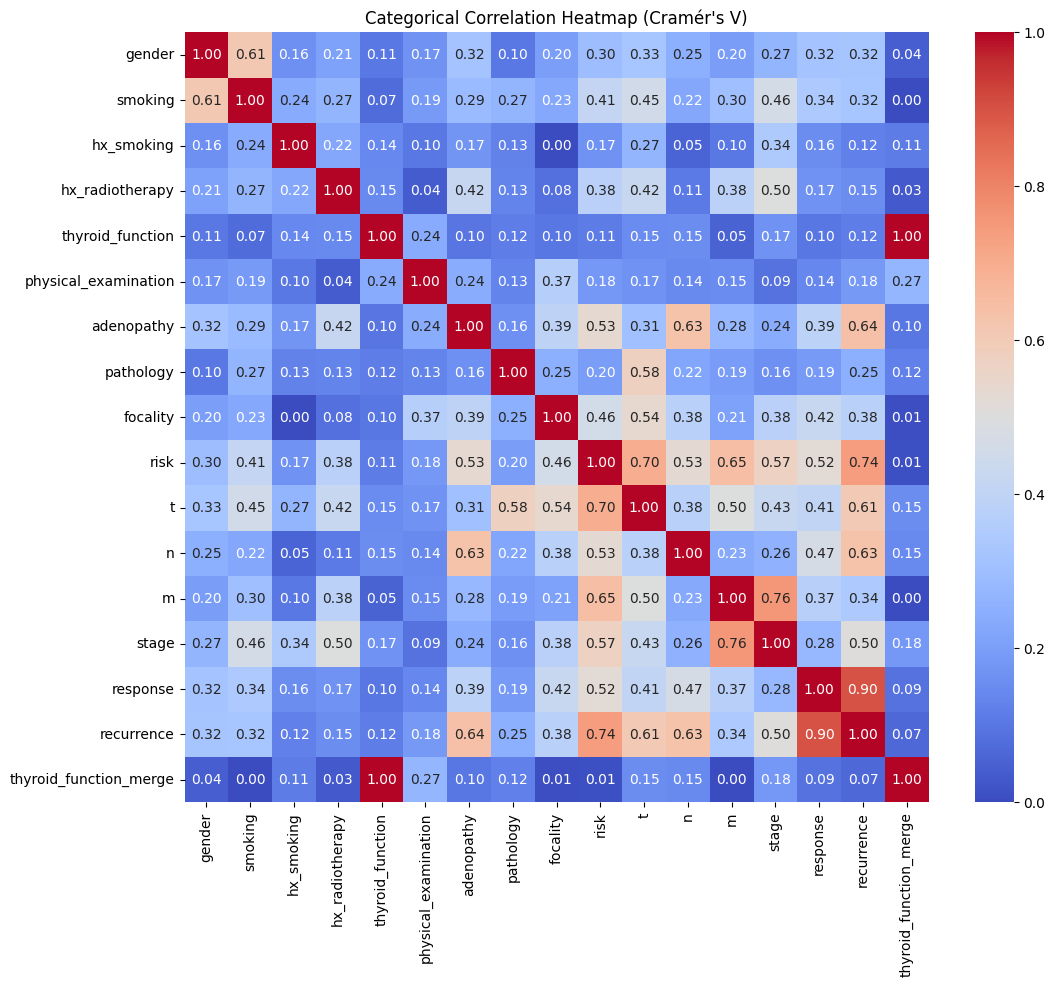

In [19]:
# Test the fixed function with the provided dataset
MyCustDataSciLib.categorical_correlation_heatmap_v3(df, columns='all')

## Relationships between numeric vs categorical columns 

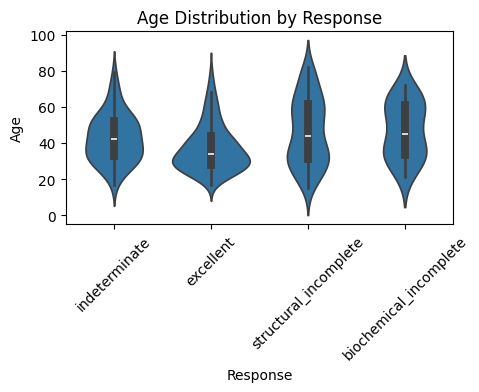

In [20]:
# Violin plot for `age` vs `response`
plt.figure(figsize=(5, 2.5))
sns.violinplot(x='response', y='age', data=df)
plt.title('Age Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

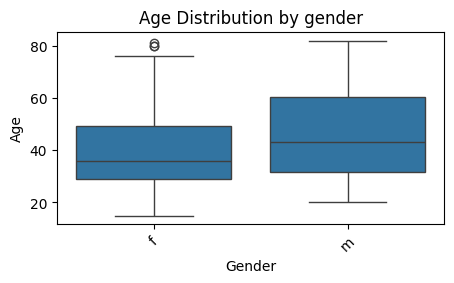

In [21]:
plt.figure(figsize=(5, 2.5))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

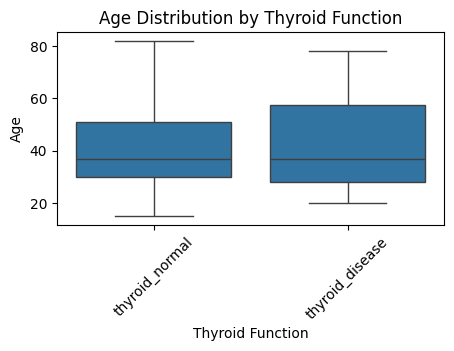

In [22]:
# Box plot for `age` vs `thyroid_function`
plt.figure(figsize=(5, 2.5))
sns.boxplot(x='thyroid_function_merge', y='age', data=df)
plt.title('Age Distribution by Thyroid Function')
plt.xlabel('Thyroid Function')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

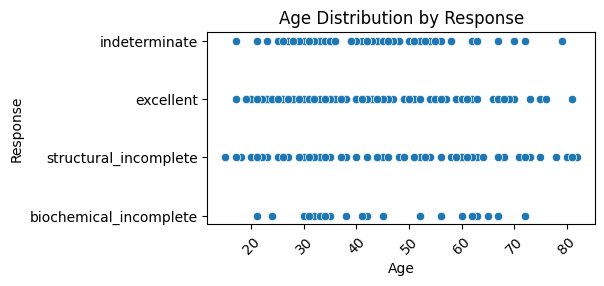

In [23]:
plt.figure(figsize=(5, 2.5))
sns.scatterplot(x='age', y='response', data=df)
plt.title('Age Distribution by Response')
plt.xlabel('Age')
plt.ylabel('Response')
plt.xticks(rotation=45)
plt.show()

In [24]:
# this correlation heat map is for numeric columns only 
'''
# Correlation heatmap for a set of numerical variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
'''

"\n# Correlation heatmap for a set of numerical variables\nsns.heatmap(df.corr(), annot=True, cmap='coolwarm')\nplt.show()\n"